In [1]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.keras.optimizers import RMSprop
from tensorflow.keras import layers, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator


DATA_DIR = '/Users/zhangzhichao/traindata/cats_and_dogs_filtered'

LR = 0.001


train_dir = os.path.join(DATA_DIR, 'train')
validation_dir = os.path.join(DATA_DIR, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

/Users/zhangzhichao/.virtualenvs/py3env/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',

)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # All images will be resized to 150x150
    batch_size=20,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),  # All images will be resized to 150x150
    batch_size=20,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [3]:
img_input = layers.Input((150, 150, 3))

x = layers.Conv2D(16, 3, activation='relu')(img_input)
print(x.shape)
x = layers.MaxPool2D(2)(x)
print(x.shape)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPool2D(2)(x)

x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPool2D(2)(x)

x = layers.Flatten()(x)

x = layers.Dense(512, activation='relu')(x)

x = layers.Dropout(0.5)(x)

output = layers.Dense(1, 'sigmoid')(x)


model = Model(img_input, output)
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=LR),
              metrics=['accuracy']
              )

(?, 148, 148, 16)
(?, 74, 74, 16)


Epoch 1/30


 - 78s - loss: 0.7318 - acc: 0.5430 - val_loss: 0.6673 - val_acc: 0.5910


Epoch 2/30


 - 79s - loss: 0.6676 - acc: 0.5750 - val_loss: 0.6503 - val_acc: 0.6050


Epoch 3/30


 - 75s - loss: 0.6416 - acc: 0.6385 - val_loss: 0.6099 - val_acc: 0.6480


Epoch 4/30


 - 76s - loss: 0.6582 - acc: 0.6320 - val_loss: 0.5921 - val_acc: 0.6820


Epoch 5/30


 - 89s - loss: 0.6292 - acc: 0.6620 - val_loss: 0.5765 - val_acc: 0.6910


Epoch 6/30


 - 82s - loss: 0.6118 - acc: 0.6785 - val_loss: 0.5665 - val_acc: 0.7010


Epoch 7/30


 - 84s - loss: 0.6037 - acc: 0.6715 - val_loss: 0.5620 - val_acc: 0.7080


Epoch 8/30


 - 84s - loss: 0.5957 - acc: 0.6855 - val_loss: 0.5451 - val_acc: 0.7190


Epoch 9/30


 - 84s - loss: 0.5880 - acc: 0.6975 - val_loss: 0.5649 - val_acc: 0.6980


Epoch 10/30


 - 86s - loss: 0.5918 - acc: 0.6920 - val_loss: 0.5417 - val_acc: 0.7240


Epoch 11/30


 - 85s - loss: 0.5900 - acc: 0.6885 - val_loss: 0.5474 - val_acc: 0.7250


Epoch 12/30


 - 90s - loss: 0.5686 - acc: 0.6985 - val_loss: 0.5312 - val_acc: 0.7220


Epoch 13/30


 - 108s - loss: 0.5804 - acc: 0.7050 - val_loss: 0.5222 - val_acc: 0.7370


Epoch 14/30


 - 97s - loss: 0.5882 - acc: 0.6905 - val_loss: 0.5207 - val_acc: 0.7460


Epoch 15/30


 - 113s - loss: 0.5707 - acc: 0.7085 - val_loss: 0.5469 - val_acc: 0.7130


Epoch 16/30


 - 106s - loss: 0.5609 - acc: 0.7285 - val_loss: 0.5103 - val_acc: 0.7450


Epoch 17/30


 - 115s - loss: 0.5553 - acc: 0.7165 - val_loss: 0.5170 - val_acc: 0.7480


Epoch 18/30


 - 112s - loss: 0.5636 - acc: 0.7005 - val_loss: 0.5766 - val_acc: 0.6950


Epoch 19/30


 - 120s - loss: 0.5719 - acc: 0.7060 - val_loss: 0.5243 - val_acc: 0.7370


Epoch 20/30


 - 113s - loss: 0.5700 - acc: 0.7160 - val_loss: 0.5146 - val_acc: 0.7350


Epoch 21/30


 - 111s - loss: 0.5589 - acc: 0.7295 - val_loss: 0.5101 - val_acc: 0.7410


Epoch 22/30


 - 103s - loss: 0.5509 - acc: 0.7255 - val_loss: 0.5120 - val_acc: 0.7410


Epoch 23/30


 - 98s - loss: 0.5614 - acc: 0.7240 - val_loss: 0.5347 - val_acc: 0.7280


Epoch 24/30


 - 101s - loss: 0.5375 - acc: 0.7345 - val_loss: 0.5710 - val_acc: 0.7140


Epoch 25/30


 - 106s - loss: 0.5451 - acc: 0.7285 - val_loss: 0.4812 - val_acc: 0.7630


Epoch 26/30


 - 106s - loss: 0.5455 - acc: 0.7250 - val_loss: 0.4991 - val_acc: 0.7530


Epoch 27/30


 - 105s - loss: 0.5369 - acc: 0.7420 - val_loss: 0.5095 - val_acc: 0.7480


Epoch 28/30


 - 104s - loss: 0.5230 - acc: 0.7415 - val_loss: 0.5173 - val_acc: 0.7360


Epoch 29/30


 - 91s - loss: 0.5415 - acc: 0.7425 - val_loss: 0.5338 - val_acc: 0.7490


Epoch 30/30


 - 90s - loss: 0.5242 - acc: 0.7400 - val_loss: 0.4914 - val_acc: 0.7590


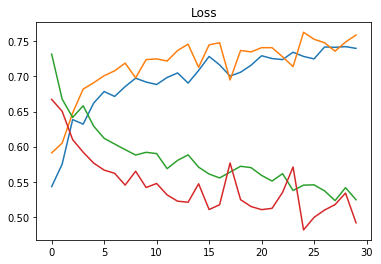

In [4]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=2
)

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Accuracy')

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Loss')

/Users/zhangzhichao/.virtualenvs/py3env/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide


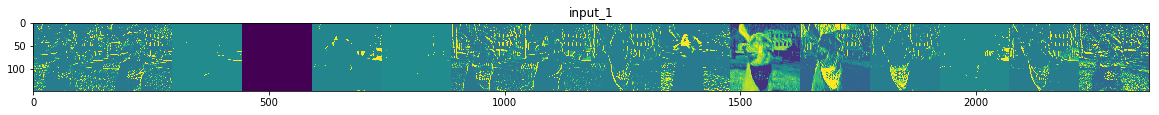

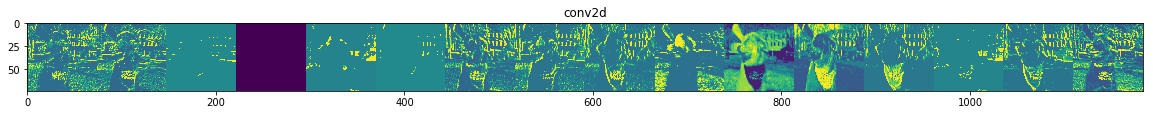

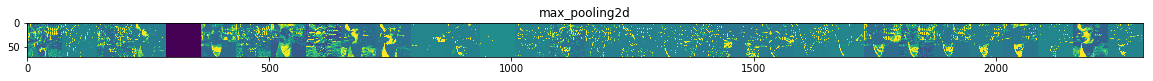

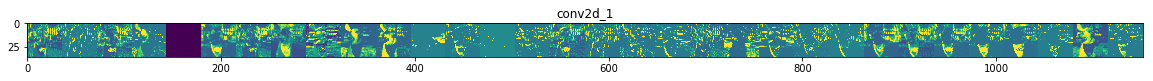

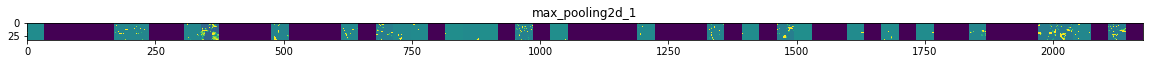

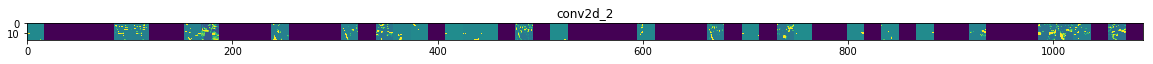

In [6]:
# random choose one pic to display
from random import choice
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

validation_cats_files = os.listdir(validation_cats_dir)
validation_dogs_files = os.listdir(validation_dogs_dir)

cat_img_files = [os.path.join(validation_cats_dir, f) for f in validation_cats_files]
dog_img_files = [os.path.join(validation_dogs_dir, f) for f in validation_dogs_files]

img_path = choice(cat_img_files + dog_img_files)

img = load_img(img_path, target_size=(150, 150))
x = img_to_array(img)
x /= 255.
x = x.reshape((1,) + x.shape)

successive_feature_maps = visualization_model.predict(x)
layer_names = [layer.name for layer in model.layers]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        feature_n = feature_map.shape[-1]

        size = feature_map.shape[1]

        display_grid = np.zeros((size, size * feature_n))

        for i in range(feature_n):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size: (i + 1) * size] = x

        scale = 20. / feature_n
        plt.figure(figsize=(scale * feature_n, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')